In [1]:
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import yfinance as yf
import pandas as pd

df = yf.download("INFY.NS", start="2018-01-01")

df.columns = df.columns.get_level_values(0)

df.reset_index(inplace=True)
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)

# Create indicators
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Direction'] = (df['Close'] > df['Close'].shift(1)).astype(int)

# Debug check
print("COLUMNS:", df.columns.tolist())

# Now this WILL work
df = df.dropna(subset=['MA20', 'MA50', 'Direction'])

print("Rows after cleaning:", len(df))
df.head()


[*********************100%***********************]  1 of 1 completed

COLUMNS: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA20', 'MA50', 'Direction']
Rows after cleaning: 1939


Price,Date,Open,High,Low,Close,Volume,MA20,MA50,Direction
49,2018-03-14,474.082774,478.341474,469.703525,474.404205,4429710,462.364232,451.952692,0
50,2018-03-15,474.082593,477.457428,470.868474,475.087006,6101500,464.066707,453.149547,1
51,2018-03-16,474.886278,475.046994,469.763774,470.828461,17954826,465.220779,454.292169,0
52,2018-03-19,467.654507,474.283630,459.076833,460.724060,7526620,465.596429,455.300198,0
53,2018-03-20,461.467276,470.065057,461.467276,467.875458,8553766,466.255327,456.498663,1


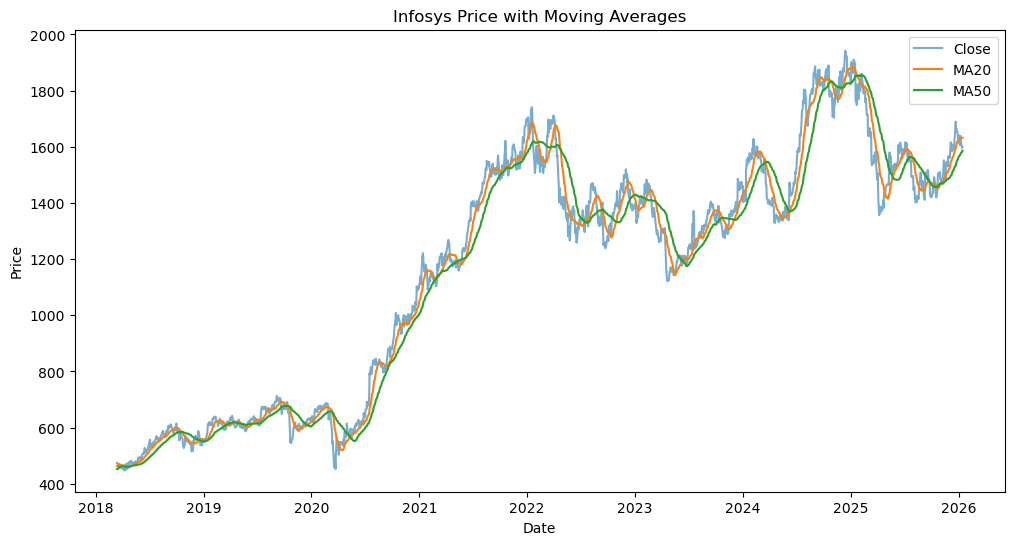

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.6)
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')

plt.title("Infosys Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [11]:
up_prob = df['Direction'].mean()
print("Up-move probability:", round(up_prob, 3))

Up-move probability: 0.526


In [12]:
df['MA_Signal'] = (df['MA20'] > df['MA50']).astype(int)

df[['Date', 'Close', 'MA20', 'MA50', 'MA_Signal']].tail()


Price,Date,Close,MA20,MA50,MA_Signal
1983,2026-01-08,1613.300049,1631.450006,1576.118005,1
1984,2026-01-09,1614.099976,1632.245007,1578.754004,1
1985,2026-01-12,1595.900024,1631.700006,1580.962004,1
1986,2026-01-13,1599.000000,1632.005005,1583.584004,1
1987,2026-01-14,1599.800049,1631.895007,1586.222004,1


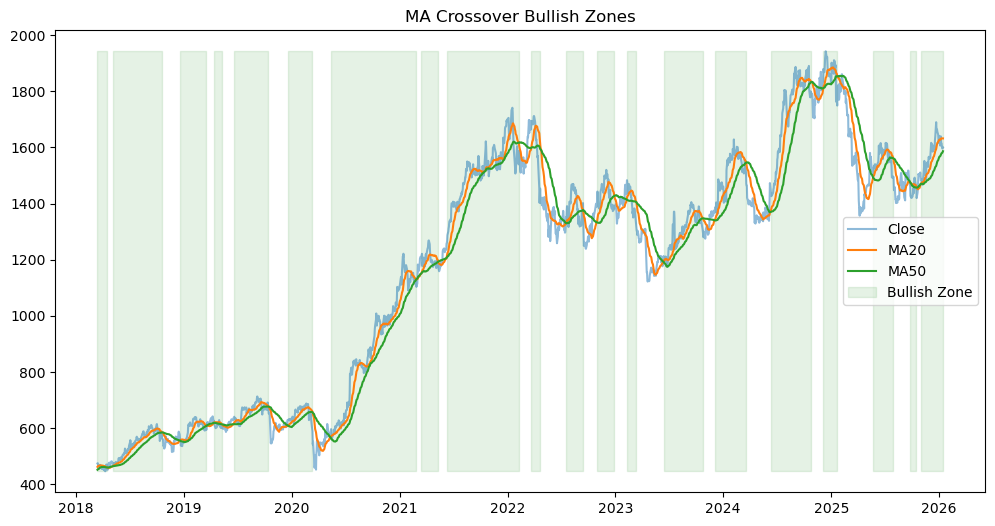

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.5)

plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')

plt.fill_between(
    df['Date'],
    df['Close'].min(),
    df['Close'].max(),
    where=(df['MA20'] > df['MA50']),
    color='green',
    alpha=0.1,
    label='Bullish Zone'
)

plt.legend()
plt.title("MA Crossover Bullish Zones")
plt.show()
